# PROJECT NAME: HOUSE PRICING

Loading required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import statistics as st
from scipy import stats
from sklearn import preprocessing

Importing the database

In [2]:
df = pd.read_csv("C:/DATA SCIENCE/Python/PyCharm Community Edition 2019.3.2/ASSIGNMENT/House Pricing/Property_Price_Train.csv")
df

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RLD,85.0,13175,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RLD,66.0,9042,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Data overview steps before data cleaning just ton understand data

In [3]:
df.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

In [4]:
df_desc = df.describe(include='all')
df_desc = df.describe(include='object')
df_desc

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,...,Garage,Garage_Finish_Year,Garage_Quality,Garage_Condition,Pavedd_Drive,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Sale_Type,Sale_Condition
count,1459,1459,91,1459,1459,1459,1459,1459,1459,1459,...,1378,1378,1378,1378,1459,7,281,54,1459,1459
unique,5,2,2,4,4,2,5,3,25,9,...,7,3,5,5,3,3,4,4,9,6
top,RLD,Paved,Grvl,Reg,Lvl,AllPub,I,GS,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1150,1453,50,924,1310,1458,1051,1381,225,1259,...,869,605,1310,1325,1339,3,157,49,1266,1197


# Data cleaning processing

checking the shape of the data

In [5]:
df.shape

(1459, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
Id                           1459 non-null int64
Building_Class               1459 non-null int64
Zoning_Class                 1459 non-null object
Lot_Extent                   1200 non-null float64
Lot_Size                     1459 non-null int64
Road_Type                    1459 non-null object
Lane_Type                    91 non-null object
Property_Shape               1459 non-null object
Land_Outline                 1459 non-null object
Utility_Type                 1459 non-null object
Lot_Configuration            1459 non-null object
Property_Slope               1459 non-null object
Neighborhood                 1459 non-null object
Condition1                   1459 non-null object
Condition2                   1459 non-null object
House_Type                   1459 non-null object
House_Design                 1459 non-null object
Overall_Material             1459 non-null int6

Checking the variable type count in df

In [7]:
df.dtypes.value_counts()

object     43
int64      31
float64     7
dtype: int64

# PREPROCESSING

1.identifying the all unique values

2.identifying all same value

In [8]:
df["Id"].unique().shape
for val in df:
    print(val,"",df[val].unique().shape)

Id  (1459,)
Building_Class  (15,)
Zoning_Class  (5,)
Lot_Extent  (111,)
Lot_Size  (1073,)
Road_Type  (2,)
Lane_Type  (3,)
Property_Shape  (4,)
Land_Outline  (4,)
Utility_Type  (2,)
Lot_Configuration  (5,)
Property_Slope  (3,)
Neighborhood  (25,)
Condition1  (9,)
Condition2  (8,)
House_Type  (5,)
House_Design  (8,)
Overall_Material  (10,)
House_Condition  (9,)
Construction_Year  (112,)
Remodel_Year  (61,)
Roof_Design  (6,)
Roof_Quality  (8,)
Exterior1st  (15,)
Exterior2nd  (16,)
Brick_Veneer_Type  (5,)
Brick_Veneer_Area  (328,)
Exterior_Material  (4,)
Exterior_Condition  (5,)
Foundation_Type  (6,)
Basement_Height  (5,)
Basement_Condition  (5,)
Exposure_Level  (5,)
BsmtFinType1  (7,)
BsmtFinSF1  (636,)
BsmtFinType2  (7,)
BsmtFinSF2  (144,)
BsmtUnfSF  (779,)
Total_Basement_Area  (721,)
Heating_Type  (6,)
Heating_Quality  (5,)
Air_Conditioning  (2,)
Electrical_System  (6,)
First_Floor_Area  (752,)
Second_Floor_Area  (417,)
LowQualFinSF  (24,)
Grade_Living_Area  (860,)
Underground_Full_Bath

dealing with unique or same value column

In [9]:
df.drop("Id",axis=1,inplace=True)
df.shape

(1459, 80)

In [10]:
df["House_life"] = 2020 - df["Construction_Year"]
df["House_life"]

0        17
1        44
2        19
3       105
4        20
       ... 
1454     16
1455     21
1456     42
1457     79
1458     70
Name: House_life, Length: 1459, dtype: int64

In [11]:
df.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Road_Type',
       'Lane_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Brick_Veneer_Area', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Heating_Type',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF',
       'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bat

Dealing with dates column

In [12]:
df.drop("Construction_Year",axis=1,inplace=True)
df.drop("Remodel_Year",axis=1,inplace=True)
df.drop("Garage_Built_Year",axis=1,inplace=True)
df.drop("Month_Sold",axis=1,inplace=True)
df.drop("Year_Sold",axis=1,inplace=True)
df.shape

(1459, 76)

Null Value analysis & treatment.

In [13]:
df.isnull().any()

Building_Class         False
Zoning_Class           False
Lot_Extent              True
Lot_Size               False
Road_Type              False
                       ...  
Miscellaneous_Value    False
Sale_Type              False
Sale_Condition         False
Sale_Price             False
House_life             False
Length: 76, dtype: bool

 NA -in this 14 variable NA has different naming
 
 Lane_Type = No_Allay_Access
 
 Basement_Height = No_Basement
 
 Basement_Condition = No_Basement
 
 Exposure_Level = No_Basement
 
 BsmtFinType1 = No_Basement
 
 BsmtFinType2 = No_Basement
 
 Fireplace_Quality = No_Fireplace
 
 Garage = No_Garage
 
 Garage_Finish_Year = No_Garage
 
 Garage_Qualit = No_Garage
 
 Garage_Condition = No_Garage
 
 Pool_Quality = No_Pool Fence_Quality = No_Fence
 
 Fence_Quality = None


In [14]:
df['Lane_Type'] = df['Lane_Type'].fillna('No_Allay_Access')
df['Lane_Type'].value_counts()

No_Allay_Access    1368
Grvl                 50
Paved                41
Name: Lane_Type, dtype: int64

In [15]:
df['Basement_Height'] = df['Basement_Height'].fillna('No_Basement')
df['Basement_Height'].value_counts()

TA             648
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: Basement_Height, dtype: int64

In [16]:
df['Basement_Condition'] = df['Basement_Condition'].fillna('No_Basement')
df['Basement_Condition'].value_counts()

TA             1310
Gd               65
Fa               45
No_Basement      37
Po                2
Name: Basement_Condition, dtype: int64

In [17]:
df['Exposure_Level'] = df['Exposure_Level'].fillna('No_Basement')
df['Exposure_Level'].value_counts()

No             952
Av             221
Gd             134
Mn             114
No_Basement     38
Name: Exposure_Level, dtype: int64

In [18]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No_Basement')
df['BsmtFinType1'].value_counts()


Unf            430
GLQ            418
ALQ            220
BLQ            147
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [19]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No_Basement')
df['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              45
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [20]:
df['Fireplace_Quality'] = df['Fireplace_Quality'].fillna('No_Fireplace')
df['Fireplace_Quality'].value_counts()

No_Fireplace    689
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: Fireplace_Quality, dtype: int64

In [21]:
df['Garage'] = df['Garage'].fillna('No_Garage')
df['Garage'].value_counts()

Attchd       869
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2TFes          5
2Types         1
Name: Garage, dtype: int64

In [22]:
df['Garage_Finish_Year'] = df['Garage_Finish_Year'].fillna('No_Garage')
df['Garage_Finish_Year'].value_counts()

Unf          605
RFn          422
Fin          351
No_Garage     81
Name: Garage_Finish_Year, dtype: int64

In [23]:
df['Garage_Quality'] = df['Garage_Quality'].fillna('No_Garage')
df['Garage_Quality'].value_counts()

TA           1310
No_Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: Garage_Quality, dtype: int64

In [24]:
df['Garage_Condition'] = df['Garage_Condition'].fillna('No_Garage')
df['Garage_Condition'].value_counts()

TA           1325
No_Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: Garage_Condition, dtype: int64

In [25]:
df['Garage'] = df['Garage'].fillna('No_Allay_Access')
df['Garage'].value_counts()

Attchd       869
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2TFes          5
2Types         1
Name: Garage, dtype: int64

In [26]:
df['Pool_Quality'] = df['Pool_Quality'].fillna('No_Pool')
df['Pool_Quality'].value_counts()

No_Pool    1452
Gd            3
Ex            2
Fa            2
Name: Pool_Quality, dtype: int64

In [27]:
df['Fence_Quality'] = df['Fence_Quality'].fillna('No_Fence')
df['Fence_Quality'].value_counts()

No_Fence    1178
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence_Quality, dtype: int64

Dealing with NaN.

In [28]:
df.isnull().any()

Building_Class         False
Zoning_Class           False
Lot_Extent              True
Lot_Size               False
Road_Type              False
                       ...  
Miscellaneous_Value    False
Sale_Type              False
Sale_Condition         False
Sale_Price             False
House_life             False
Length: 76, dtype: bool

In [29]:
df.isnull().sum()

Building_Class           0
Zoning_Class             0
Lot_Extent             259
Lot_Size                 0
Road_Type                0
                      ... 
Miscellaneous_Value      0
Sale_Type                0
Sale_Condition           0
Sale_Price               0
House_life               0
Length: 76, dtype: int64

In [30]:
for val in df:
 print(val, " ", (df[val].isnull().sum() / df.shape[0]) * 100)

Building_Class   0.0
Zoning_Class   0.0
Lot_Extent   17.751884852638796
Lot_Size   0.0
Road_Type   0.0
Lane_Type   0.0
Property_Shape   0.0
Land_Outline   0.0
Utility_Type   0.0
Lot_Configuration   0.0
Property_Slope   0.0
Neighborhood   0.0
Condition1   0.0
Condition2   0.0
House_Type   0.0
House_Design   0.0
Overall_Material   0.0
House_Condition   0.0
Roof_Design   0.0
Roof_Quality   0.0
Exterior1st   0.0
Exterior2nd   0.0
Brick_Veneer_Type   0.5483207676490748
Brick_Veneer_Area   0.5483207676490748
Exterior_Material   0.0
Exterior_Condition   0.0
Foundation_Type   0.0
Basement_Height   0.0
Basement_Condition   0.0
Exposure_Level   0.0
BsmtFinType1   0.0
BsmtFinSF1   0.0
BsmtFinType2   0.0
BsmtFinSF2   0.0
BsmtUnfSF   0.0
Total_Basement_Area   0.0
Heating_Type   0.0
Heating_Quality   0.0
Air_Conditioning   0.0
Electrical_System   0.06854009595613435
First_Floor_Area   0.0
Second_Floor_Area   0.0
LowQualFinSF   0.0
Grade_Living_Area   0.0
Underground_Full_Bathroom   0.0
Underground_H

Drop column having more than 75% nan

In [31]:
df.drop("Miscellaneous_Feature",axis=1,inplace=True)
df.shape

(1459, 75)

No of rows getting affctected by removing na's

In [32]:
no_of_rows = df[df.isna().sum(axis=1) >= 1].shape[0]
no_of_rows

266

% of rows getting affcted by removing Na's from column.

In [33]:
print((no_of_rows / df.shape[0]) * 100)

18.231665524331735


Imputation according to data type

In [34]:
            def imputenull(data):
                for col in data.columns:
                    if data[col].dtypes == 'int64' or data[col].dtypes == 'float64':
                        data[col].fillna((data[col].mean()), inplace=True)
                    else:
                        data[col].fillna(data[col].value_counts().index[0], inplace=True)


            imputenull(df)

Now checking on the dataset after imputing the columns

In [35]:
df.isnull().sum()

Building_Class         0
Zoning_Class           0
Lot_Extent             0
Lot_Size               0
Road_Type              0
                      ..
Miscellaneous_Value    0
Sale_Type              0
Sale_Condition         0
Sale_Price             0
House_life             0
Length: 75, dtype: int64

Converting Numerical to Factor

'Garage_Size','Fireplaces','Rooms_Above_Grade','Kitchen_Above_Grade',
 'Bedroom_Above_Grade','Half_Bathroom_Above_Grade','Full_Bathroom_Above_Grade',
'Underground_Half_Bathroom','Underground_Full_Bathroom','House_Condition', 'Overall_Material','Building_Class'

In [36]:
df["Garage_Size"] = df["Garage_Size"].astype("object")
df["Fireplaces"] = df["Fireplaces"].astype("object")
df["Rooms_Above_Grade"] = df["Rooms_Above_Grade"].astype("object")
df["Kitchen_Above_Grade"] = df["Kitchen_Above_Grade"].astype("object")
df["Bedroom_Above_Grade"] = df["Bedroom_Above_Grade"].astype("object")
df["Half_Bathroom_Above_Grade"] = df["Half_Bathroom_Above_Grade"].astype("object")
df["Full_Bathroom_Above_Grade"] = df["Full_Bathroom_Above_Grade"].astype("object")
df["Underground_Half_Bathroom"] = df["Underground_Half_Bathroom"].astype("object")
df["Underground_Full_Bathroom"] = df["Underground_Full_Bathroom"].astype("object")
df["House_Condition"] = df["House_Condition"].astype("object")
df["Overall_Material"] = df["Overall_Material"].astype("object")
df["Building_Class"] = df["Building_Class"].astype("object")
df.dtypes

Building_Class          object
Zoning_Class            object
Lot_Extent             float64
Lot_Size                 int64
Road_Type               object
                        ...   
Miscellaneous_Value      int64
Sale_Type               object
Sale_Condition          object
Sale_Price               int64
House_life               int64
Length: 75, dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
Building_Class               1459 non-null object
Zoning_Class                 1459 non-null object
Lot_Extent                   1459 non-null float64
Lot_Size                     1459 non-null int64
Road_Type                    1459 non-null object
Lane_Type                    1459 non-null object
Property_Shape               1459 non-null object
Land_Outline                 1459 non-null object
Utility_Type                 1459 non-null object
Lot_Configuration            1459 non-null object
Property_Slope               1459 non-null object
Neighborhood                 1459 non-null object
Condition1                   1459 non-null object
Condition2                   1459 non-null object
House_Type                   1459 non-null object
House_Design                 1459 non-null object
Overall_Material             1459 non-null object
House_Condition              1459 non-null 

In [38]:
df.dtypes.value_counts()

object     54
int64      15
float64     6
dtype: int64

Area column having negative values Replace it with zero

In [39]:
df['Garage_Area'] = df['Garage_Area'].clip(lower=0)
df['W_Deck_Area'] = df['W_Deck_Area'].clip(lower=0)
df['Open_Lobby_Area'] = df['Open_Lobby_Area'].clip(lower=0)
df['Enclosed_Lobby_Area'] = df['Enclosed_Lobby_Area'].clip(lower=0)

Checking the single value value domination/biased

In [40]:
 quasi_constant_feat = []
 for feature in df.columns:
     dominant = (df[feature].value_counts() / np.float(len(df))).sort_values(ascending=False).values[0]
     if dominant > 0.95:
        quasi_constant_feat.append(feature)
 print(quasi_constant_feat)

['Road_Type', 'Utility_Type', 'Condition2', 'Roof_Quality', 'Heating_Type', 'LowQualFinSF', 'Kitchen_Above_Grade', 'Three_Season_Lobby_Area', 'Pool_Area', 'Pool_Quality', 'Miscellaneous_Value']


remove biased column

In [41]:
df.drop("Road_Type",axis=1,inplace=True)
df.drop("Utility_Type",axis=1,inplace=True)
df.drop("Condition2",axis=1,inplace=True)
df.drop("Roof_Quality",axis=1,inplace=True)
df.drop("Heating_Type",axis=1,inplace=True)
df.drop("LowQualFinSF",axis=1,inplace=True)
df.drop("Kitchen_Above_Grade",axis=1,inplace=True)
df.drop("Three_Season_Lobby_Area",axis=1,inplace=True)
df.drop("Pool_Area",axis=1,inplace=True)
df.drop("Pool_Quality",axis=1,inplace=True)
df.drop("Miscellaneous_Value",axis=1,inplace=True)
df.shape

(1459, 64)

In [42]:
df

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Lane_Type,Property_Shape,Land_Outline,Lot_Configuration,Property_Slope,Neighborhood,...,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Screen_Lobby_Area,Fence_Quality,Sale_Type,Sale_Condition,Sale_Price,House_life
0,60,RLD,65.0,8450,No_Allay_Access,Reg,Lvl,I,GS,CollgCr,...,Y,163.788080,69.596115,20.337934,0,No_Fence,WD,Normal,208500,17
1,20,RLD,80.0,9600,No_Allay_Access,Reg,Lvl,FR2P,GS,Veenker,...,Y,198.900074,74.716033,15.039392,0,No_Fence,WD,Normal,181500,44
2,60,RLD,68.0,11250,No_Allay_Access,IR1,Lvl,I,GS,CollgCr,...,Y,26.127533,32.085268,0.000000,0,No_Fence,WD,Normal,223500,19
3,70,RLD,60.0,9550,No_Allay_Access,IR1,Lvl,C,GS,Crawfor,...,Y,46.948018,40.181415,60.921821,0,No_Fence,WD,Abnorml,140000,105
4,60,RLD,84.0,14260,No_Allay_Access,IR1,Lvl,FR2P,GS,NoRidge,...,Y,0.000000,20.755323,21.788818,0,No_Fence,WD,Normal,250000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FVR,62.0,7500,Paved,Reg,Lvl,I,GS,Somerst,...,Y,0.000000,0.000000,126.676547,0,No_Fence,WD,Normal,185000,16
1455,60,RLD,62.0,7917,No_Allay_Access,Reg,Lvl,I,GS,Gilbert,...,Y,0.000000,113.043436,125.521880,0,No_Fence,WD,Normal,175000,21
1456,20,RLD,85.0,13175,No_Allay_Access,Reg,Lvl,I,GS,NWAmes,...,Y,36.180338,221.514480,148.266666,0,MnPrv,WD,Normal,210000,42
1457,70,RLD,66.0,9042,No_Allay_Access,Reg,Lvl,I,GS,Crawfor,...,Y,88.568242,110.888690,54.320896,0,GdPrv,WD,Normal,266500,79


Target variable analysis

In [43]:
df.rename(columns={'Sale_Price':'tar_var'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 64 columns):
Building_Class               1459 non-null object
Zoning_Class                 1459 non-null object
Lot_Extent                   1459 non-null float64
Lot_Size                     1459 non-null int64
Lane_Type                    1459 non-null object
Property_Shape               1459 non-null object
Land_Outline                 1459 non-null object
Lot_Configuration            1459 non-null object
Property_Slope               1459 non-null object
Neighborhood                 1459 non-null object
Condition1                   1459 non-null object
House_Type                   1459 non-null object
House_Design                 1459 non-null object
Overall_Material             1459 non-null object
House_Condition              1459 non-null object
Roof_Design                  1459 non-null object
Exterior1st                  1459 non-null object
Exterior2nd                  1459 non-null 

Plotting histogram of target variable

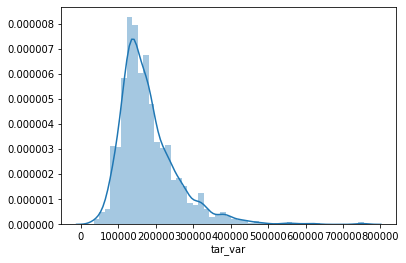

In [44]:
tar_var = df['tar_var']
sns.distplot(tar_var);

 Histograms : by removing density plot from top of it.

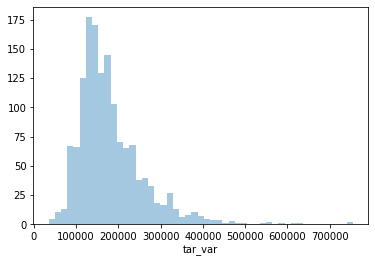

In [45]:
sns.distplot(tar_var, kde=False, rug=False);

Kernel density estimation :

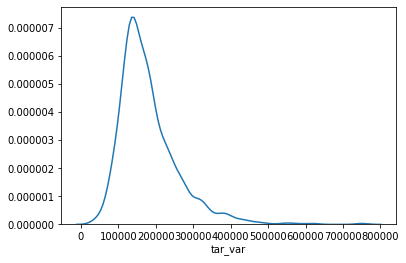

In [46]:
sns.distplot(tar_var, hist=False, rug=False);

Checking skewness

In [47]:
tar_var.skew()

1.8817600468196507

Discover outliers with mathematical function

In [48]:
z = np.abs(stats.zscore(tar_var))
print(z)

[0.34688698 0.0069979  0.53571424 ... 0.36576971 1.07701907 0.48867367]


In [49]:
threshold = 3
print(np.where(z > 3))
x= np.where(z > 3)

(array([  58,  178,  185,  349,  389,  440,  473,  496,  527,  591,  664,
        691,  769,  798,  803,  898, 1046, 1142, 1169, 1182, 1243, 1373],
      dtype=int64),)


no of outliers

In [50]:
no_of_outlier=  len(x[0])
no_of_outlier

22

In [51]:
df.iloc[np.where(z > 3)[:1]]

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Lane_Type,Property_Shape,Land_Outline,Lot_Configuration,Property_Slope,Neighborhood,...,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Screen_Lobby_Area,Fence_Quality,Sale_Type,Sale_Condition,tar_var,House_life
58,60,RLD,66.000000,13682,No_Allay_Access,IR2,HLS,CulDSac,GS,StoneBr,...,Y,143.546611,38.096634,0.000000,0,No_Fence,New,Partial,438780,14
178,20,RLD,63.000000,17423,No_Allay_Access,IR1,Lvl,CulDSac,GS,StoneBr,...,Y,148.575176,0.000000,0.000000,0,No_Fence,New,Partial,501837,12
185,75,RMD,90.000000,22950,No_Allay_Access,IR2,Lvl,I,GS,OldTown,...,Y,192.300758,28.778159,28.453881,410,GdPrv,WD,Normal,475000,128
349,60,RLD,56.000000,20431,No_Allay_Access,IR2,Lvl,I,GS,NridgHt,...,Y,396.150118,0.000000,89.157196,0,No_Fence,New,Partial,437154,15
389,60,RLD,96.000000,12474,No_Allay_Access,Reg,Lvl,I,GS,NridgHt,...,Y,0.057297,234.675577,30.542865,0,No_Fence,New,Partial,426000,13
440,20,RLD,105.000000,15431,No_Allay_Access,Reg,Lvl,I,GS,NridgHt,...,Y,177.858013,84.790279,113.336185,170,No_Fence,WD,Normal,555000,12
473,20,RLD,110.000000,14977,No_Allay_Access,IR1,Lvl,I,GS,NridgHt,...,Y,0.000000,3.169658,63.288096,0,No_Fence,New,Partial,440000,14
496,20,RLD,70.045833,12692,No_Allay_Access,IR1,Lvl,I,GS,NoRidge,...,Y,210.811799,0.000000,0.000000,0,No_Fence,WD,Normal,430000,28
527,60,RLD,67.000000,14948,No_Allay_Access,IR1,Lvl,I,GS,NridgHt,...,Y,163.198507,69.389608,36.809422,0,No_Fence,New,Partial,446261,12
591,60,RLD,97.000000,13478,No_Allay_Access,IR1,Lvl,C,GS,NridgHt,...,Y,397.245512,112.142838,0.000000,0,No_Fence,ConLI,Normal,451950,12


remove outliers

In [52]:
df.drop(df.index[x[:1]], inplace=True)

Further skewness treatment with transformation

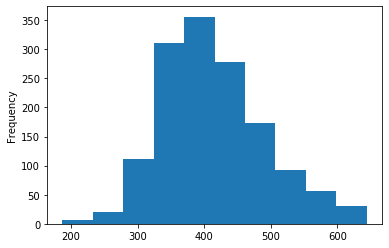

In [53]:
df["tar_var"] = df["tar_var"] ** (1 / 2)
df.tar_var.plot(kind="hist")

In [54]:
df.tar_var.skew()

0.47977756187892484

In [55]:
df.shape

(1437, 64)

# EDA part

segregate the data

In [56]:
df_num = df.select_dtypes(include=['int64','float64' ])
df_fac = df.select_dtypes(include=['object'])
df.dtypes

Building_Class     object
Zoning_Class       object
Lot_Extent        float64
Lot_Size            int64
Lane_Type          object
                   ...   
Fence_Quality      object
Sale_Type          object
Sale_Condition     object
tar_var           float64
House_life          int64
Length: 64, dtype: object

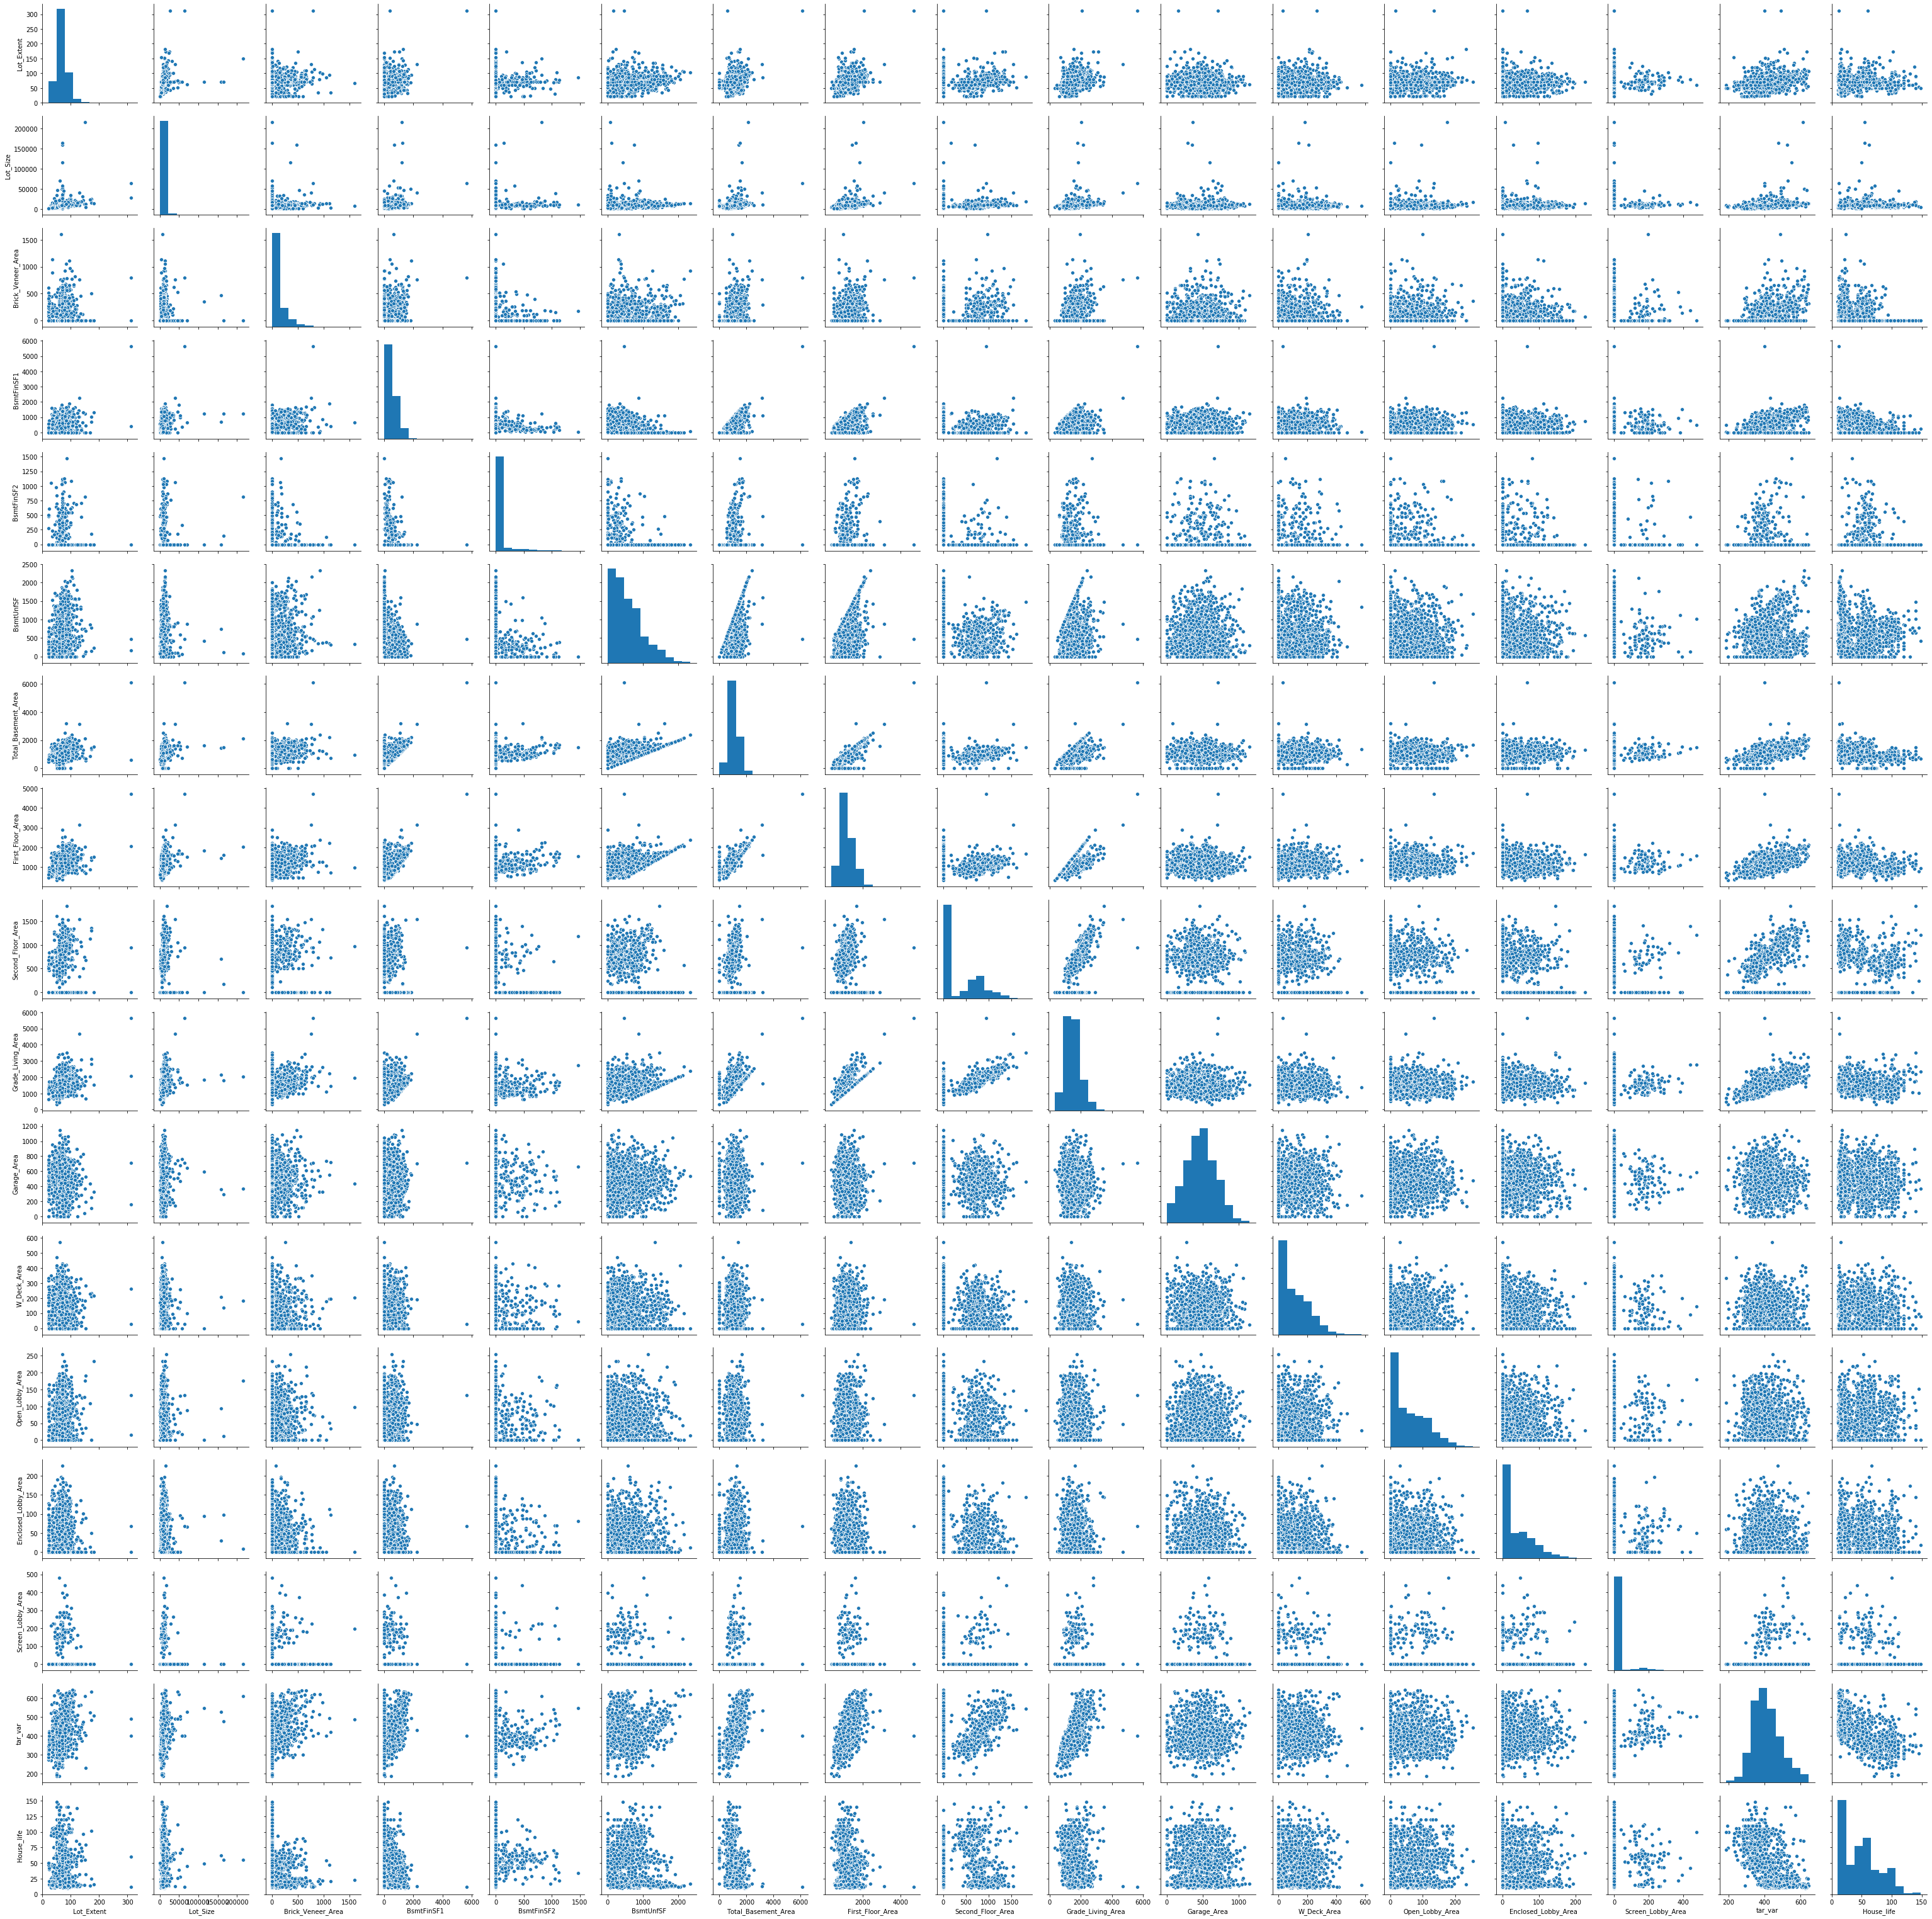

In [57]:
sns.pairplot(df_num)

skewness for all numric data

In [58]:
df_num.skew()

Lot_Extent              2.445108
Lot_Size               12.487871
Brick_Veneer_Area       2.574622
BsmtFinSF1              1.744004
BsmtFinSF2              4.255492
BsmtUnfSF               0.905455
Total_Basement_Area     1.506467
First_Floor_Area        1.338387
Second_Floor_Area       0.759446
Grade_Living_Area       1.211908
Garage_Area             0.080008
W_Deck_Area             0.757280
Open_Lobby_Area         0.697399
Enclosed_Lobby_Area     1.067202
Screen_Lobby_Area       4.148158
tar_var                 0.479778
House_life              0.595096
dtype: float64

transformation

In [59]:
df_num["Lot_Extent"]= np.log(df_num["Lot_Extent"])
df_num["Lot_Size"]= np.log(df_num["Lot_Size"])
df_num["Lot_Extent"] = df_num["Lot_Extent"] ** (1 / 3)
df_num["Lot_Size"] = df_num["Lot_Size"] ** (1 / 3)
df_num["Brick_Veneer_Area"] = df_num["Brick_Veneer_Area"] ** (1 / 3)
df_num["BsmtFinSF2"] = df_num["BsmtFinSF2"] ** (1 / 3)
df_num["Screen_Lobby_Area"] = df_num["Screen_Lobby_Area"] ** (1 / 3)
df_num.skew()

C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Lot_Extent            -1.314690
Lot_Size              -0.509480
Brick_Veneer_Area      0.693232
BsmtFinSF1             1.744004
BsmtFinSF2             2.727737
BsmtUnfSF              0.905455
Total_Basement_Area    1.506467
First_Floor_Area       1.338387
Second_Floor_Area      0.759446
Grade_Living_Area      1.211908
Garage_Area            0.080008
W_Deck_Area            0.757280
Open_Lobby_Area        0.697399
Enclosed_Lobby_Area    1.067202
Screen_Lobby_Area      3.259742
tar_var                0.479778
House_life             0.595096
dtype: float64

# Variable Significance
 Checking for co-relation

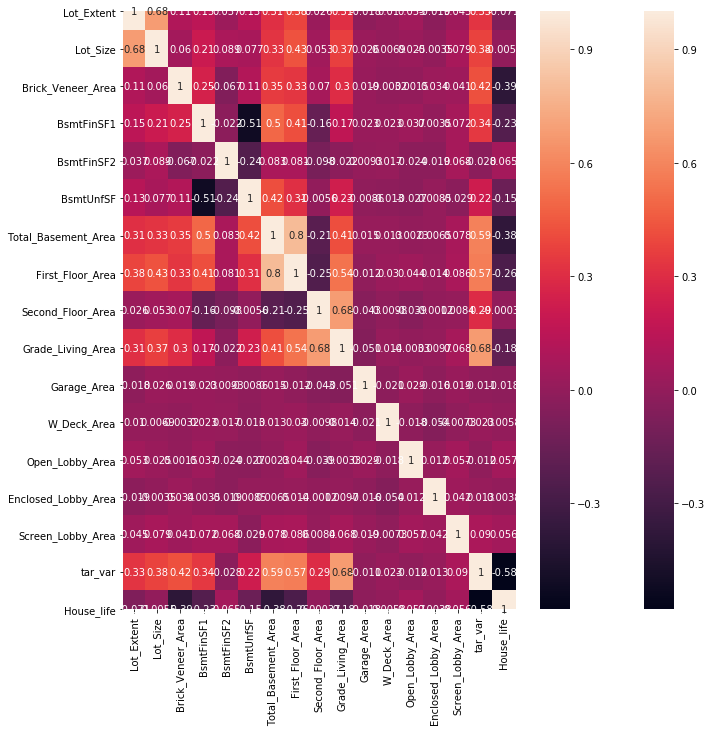

In [60]:
corrmat= df_num.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)
sns.heatmap(corrmat,annot=True)

In [61]:
            def checkcorrelation(dataset, threshold):
                col_corr = set()
                cor_matrix = dataset.corr()
                for i in range(len(cor_matrix.columns)):
                    for j in range(i):
                        if abs(cor_matrix.iloc[i, j]) > threshold:
                            colname = cor_matrix.columns[i]
                            col_corr.add(colname)
                return col_corr

            checkcorrelation(df_num, 0.8)

{'First_Floor_Area'}

drop the highly co-related columns

In [62]:
df_num.drop("First_Floor_Area", axis=1, inplace=True)
df_num.columns

C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Lot_Extent', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Second_Floor_Area',
       'Grade_Living_Area', 'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area',
       'Enclosed_Lobby_Area', 'Screen_Lobby_Area', 'tar_var', 'House_life'],
      dtype='object')

Combining Fact and Numeric data

In [63]:
New_df = pd.concat([df_num,df_fac], axis=1)
New_df.columns

Index(['Lot_Extent', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Second_Floor_Area',
       'Grade_Living_Area', 'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area',
       'Enclosed_Lobby_Area', 'Screen_Lobby_Area', 'tar_var', 'House_life',
       'Building_Class', 'Zoning_Class', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Roof_Design', 'Exterior1st', 'Exterior2nd',
       'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Gr

# Model Building

In [64]:
tar_var = New_df['tar_var']
New_df.drop("tar_var", axis = 1, inplace=True)
New_df.columns

Index(['Lot_Extent', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Second_Floor_Area',
       'Grade_Living_Area', 'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area',
       'Enclosed_Lobby_Area', 'Screen_Lobby_Area', 'House_life',
       'Building_Class', 'Zoning_Class', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Roof_Design', 'Exterior1st', 'Exterior2nd',
       'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Kitc

Label Encoding

In [65]:
le = preprocessing.LabelEncoder()
df = New_df.apply(le.fit_transform)
df.head()

,Lot_Extent,Lot_Size,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Second_Floor_Area,Grade_Living_Area,Garage_Area,...,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,Fence_Quality,Sale_Type,Sale_Condition
0,36,327,129,360,0,71,179,231,530,1417,...,3,2,2,2,5,5,2,4,8,4
1,52,498,0,480,0,165,441,0,258,130,...,5,2,2,2,5,5,2,4,8,4
2,39,702,105,221,0,276,214,238,569,153,...,5,2,2,2,5,5,2,4,8,4
3,31,489,0,66,0,343,117,179,535,1209,...,2,6,3,3,5,5,2,4,8,0
4,56,918,222,327,0,315,370,319,731,975,...,5,2,2,3,5,5,2,4,8,4


Boruta for feature selection

In [66]:
X = np.array(df)
Y = np.array(tar_var)

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from boruta import BorutaPy
boruta_feature_selector = BorutaPy(rf, n_estimators = 'auto', random_state=4242, max_iter = 20, perc = 90, verbose=2)
boruta_feature_selector.fit(X,Y)

Iteration: 	1 / 20
Confirmed: 	0
Tentative: 	62
Rejected: 	0
Iteration: 	2 / 20
Confirmed: 	0
Tentative: 	62
Rejected: 	0
Iteration: 	3 / 20
Confirmed: 	0
Tentative: 	62
Rejected: 	0
Iteration: 	4 / 20
Confirmed: 	0
Tentative: 	62
Rejected: 	0
Iteration: 	5 / 20
Confirmed: 	0
Tentative: 	62
Rejected: 	0
Iteration: 	6 / 20
Confirmed: 	0
Tentative: 	62
Rejected: 	0
Iteration: 	7 / 20
Confirmed: 	0
Tentative: 	62
Rejected: 	0
Iteration: 	8 / 20
Confirmed: 	19
Tentative: 	5
Rejected: 	38
Iteration: 	9 / 20
Confirmed: 	19
Tentative: 	5
Rejected: 	38
Iteration: 	10 / 20
Confirmed: 	19
Tentative: 	5
Rejected: 	38
Iteration: 	11 / 20
Confirmed: 	19
Tentative: 	5
Rejected: 	38
Iteration: 	12 / 20
Confirmed: 	19
Tentative: 	5
Rejected: 	38
Iteration: 	13 / 20
Confirmed: 	19
Tentative: 	5
Rejected: 	38
Iteration: 	14 / 20
Confirmed: 	19
Tentative: 	5
Rejected: 	38
Iteration: 	15 / 20
Confirmed: 	19
Tentative: 	5
Rejected: 	38
Iteration: 	16 / 20
Confirmed: 	19
Tentative: 	5
Rejected: 	38
Iteratio

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                         max_depth=None, max_features='auto',
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=69, n_jobs=None,
                                         oob_score=False,
                                         random_state=<mtrand.RandomState object at 0x00000223F461B9F8>,
                                         verbose=0, warm_start=False),
         max_iter=20, n_estimators='auto', perc=90,
         random_state=<mtrand.RandomState object at 0x00000223F461B9F8>,
       

In [68]:
boruta_feature_selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False])

In [69]:
Imp_feature = pd.DataFrame({"Feature_Name":New_df.columns, "Importance":list(boruta_feature_selector.support_)})
columns = New_df.columns
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)

In [70]:
for x in np.nditer(indexes):
    final_features.append(columns[x])
print(final_features)

['Lot_Extent', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'W_Deck_Area', 'House_life', 'Zoning_Class', 'Neighborhood', 'Overall_Material', 'House_Condition', 'Basement_Height', 'Air_Conditioning', 'Fireplaces', 'Garage', 'Garage_Size']


In [71]:
df = df[['Lot_Extent', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'W_Deck_Area', 'House_life', 'Zoning_Class', 'Neighborhood', 'Overall_Material', 'House_Condition', 'Basement_Height', 'Air_Conditioning', 'Fireplaces', 'Garage', 'Garage_Size']]
df.shape

(1437, 19)

# Spliting now.

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df, tar_var, random_state = 10,test_size = 0.3)
x_train.shape

(1005, 19)

In [73]:
y_train.shape

(1005,)

In [74]:
x_test.shape

(432, 19)

In [75]:
y_test.shape

(432,)

# Linear regression
Implementing model

In [76]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
result = model.fit(x_train, y_train)

Printing the coefficient

In [77]:
print(model.intercept_)

223.63011118486924


In [78]:
print(model.coef_)

[ 1.01282116e-01  1.94928253e-02  1.78290586e-02  2.74548058e-02
 -1.53965256e-02  7.46933594e-02  2.25230615e-02  9.39573307e-02
 -1.25652384e-03 -5.29124397e-01 -3.49839046e+00 -2.86898200e-02
  1.63385263e+01  1.12455169e+01 -5.49063123e+00  4.42549921e+00
  8.14769230e+00  2.07172645e-01  9.50004810e+00]


In [79]:
x_train.columns

Index(['Lot_Extent', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtUnfSF', 'Total_Basement_Area', 'Second_Floor_Area',
       'Grade_Living_Area', 'W_Deck_Area', 'House_life', 'Zoning_Class',
       'Neighborhood', 'Overall_Material', 'House_Condition',
       'Basement_Height', 'Air_Conditioning', 'Fireplaces', 'Garage',
       'Garage_Size'],
      dtype='object')

Rsquare value

In [80]:
score= model.score(x_train, y_train)
score

0.8671091329781802

Prediction

In [81]:
predictions = model.predict(x_test)
pred_train =model.predict(x_train)
mean_y_val= y_train.mean()
print(mean_y_val)

411.6275530650123


Adj_Rsquare and R_square Values calculation

In [82]:
SSE = np.sum(np.square(pred_train - y_train))
print("Value of SSE is",SSE)

Value of SSE is 786200.8870452524


In [83]:
SSR = np.sum(np.square(pred_train - mean_y_val))
print("value of SSR is",SSR)

value of SSR is 5129938.458453659


In [84]:
Rsquare  = SSR/ (SSR+SSE)
print("value of Rsq is",Rsquare)

value of Rsq is 0.8671091329781802


Adjusted rsq

In [85]:
Adj_Rsqu = 1 - ( (1-Rsquare))*(1005-1)     /   (1005 - 19 - 1)
print("value of adj rsqr is ",Adj_Rsqu)

value of adj rsqr is  0.86454575584781


Getting the model eveluation from predicted values

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

model evaluation

In [87]:
mse = mean_squared_error(y_test, predictions)
mse

718.5665188656648

In [88]:
RSME= np.sqrt(mse)
RSME

26.806091077694724

MAPE-mean absolute percentage error

In [89]:
error = y_test - predictions
error_abs = np.abs(error)
error_abs[:]

1011    29.991472
522     18.881847
622      6.032413
310      7.060476
997      5.079181
          ...    
750     27.730140
887      0.415053
267     13.569724
837      8.997158
787      4.009554
Name: tar_var, Length: 432, dtype: float64

In [90]:
MAPE = np.mean(error_abs/y_test)*100
print("MAPE error is ",MAPE)

MAPE error is  4.631462562913517


In [91]:
print("Acurracy of the model is",(100 -MAPE),"%")

Acurracy of the model is 95.36853743708649 %


Converting the y_pred as actual values ( due to transformation)

In [92]:
Y_pred = predictions**2
Y_pred

array([119867.76061845, 174414.7231623 , 130603.4900249 , 171396.22786296,
       180656.52102402, 269440.96006713, 154885.78810579, 141392.19726125,
       287316.64135136, 175499.06174984, 200652.88689261, 134647.50028062,
       122950.12719214, 230344.3932292 , 135030.13783878, 155702.70062385,
       108144.83403461, 222233.19359812, 250662.04290424, 150924.41382958,
       228108.23858909, 127847.29122161, 178938.75640038, 244475.11167819,
       272567.15059716, 238110.71095121, 151390.79644741, 263185.4717161 ,
       142850.97535988, 252379.12315599, 127475.4008544 , 139072.36693246,
       255309.18170984, 143306.90272511, 193336.42635314, 101658.61165933,
       155780.00919226, 136459.86446289, 132233.40008394, 144603.84674213,
       196015.18203763, 159340.71348847, 127677.19135017, 170890.5283672 ,
       121900.77767491, 187107.96693688, 126111.92468436, 174483.83322152,
       133182.70467883, 118562.74346211, 222490.56489966, 197117.02335794,
       100762.76060536,  

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [94]:
lm = LinearRegression()
lm_lasso = Lasso()
lm_ridge = Ridge()
lm_elastic = ElasticNet()

In [95]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
lm_lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
lm_ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
lm_elastic.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

R-Square value

In [99]:
np.round(lm.score(x_test, y_test)*100,2)

88.75

In [100]:
np.round(lm_lasso.score(x_test, y_test)*100,2)

88.3

In [101]:
np.round(lm_ridge.score(x_test, y_test)*100,2)

88.75

In [102]:
np.round(lm_elastic.score(x_test, y_test)*100,2)

87.39

Prediction

In [103]:
predict_lm = lm.predict(x_test)
predict_lm_lasso = lm_lasso.predict(x_test)
predict_lm_ridge = lm_ridge.predict(x_test)
predict_lm_elastic = lm_elastic.predict(x_test)

MSE

In [104]:
from sklearn import metrics 
np.round(metrics.mean_squared_error(y_test,predict_lm),2)

718.57

In [105]:
np.round(metrics.mean_squared_error(y_test,predict_lm_lasso),2)

747.26

In [106]:
np.round(metrics.mean_squared_error(y_test,predict_lm_ridge),2)

718.75

In [107]:
np.round(metrics.mean_squared_error(y_test,predict_lm_elastic),2)

805.71